In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [41]:
df = pd.read_csv('AB_NYC_2019.csv')

## Data loading and overview

#### For the first step, we will analysing the columns and cleaning the null values

In [42]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Creating method for analysing null values

In [43]:
def print_resume_null_values(df):
    print(df.shape)
    tb_info = pd.DataFrame(df.dtypes).T.rename(index={0: 'Types'})
    tb_info = tb_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'Null Values'}))
    tb_info = tb_info.append(pd.DataFrame(round(df.isnull().sum()/df.shape[0] * 100, 2)).T.rename(index={0: 'Null Values (%)'}))
    return tb_info

In [44]:
print_resume_null_values(df)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
Types,int64,object,int64,object,object,object,float64,float64,object,int64,int64,int64,object,float64,int64,int64
Null Values,0,16,0,21,0,0,0,0,0,0,0,0,10052,10052,0,0
Null Values (%),0,0.03,0,0.04,0,0,0,0,0,0,0,0,20.56,20.56,0,0


### Converting columns to the correct types

In [45]:
df['host_id'] = df['host_id'].astype(int)
df['minimum_nights'] = df['minimum_nights'].astype(int)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(int)
df['availability_365'] = df['availability_365'].astype(int)
df['price'] = df['price'].astype(float)
df['reviews_per_month'] = df['reviews_per_month'].astype(float)
df['last_review'] = pd.to_datetime(df['last_review'])

### Creating column 'month'

In [46]:
df['month'] = 0
for index, item in df.loc[df['last_review'].notnull()].iterrows():
  df.loc[df['id'] == item['id'], 'month'] = int(item['last_review'].month)

### Creating column 'year'

In [47]:
df['year'] = 0
for index, item in df.loc[df['last_review'].notnull()].iterrows():
  df.loc[df['id'] == item['id'], 'year'] = int(item['last_review'].year)

### Replacing null values in the 'reviews_per_ month' column with the median.

In [48]:
df.loc[df['reviews_per_month'].isnull(), 'reviews_per_month'] = df['reviews_per_month'].median()
df['reviews_per_month']

0        0.21
1        0.38
2        0.72
3        4.64
4        0.10
         ... 
48890    0.72
48891    0.72
48892    0.72
48893    0.72
48894    0.72
Name: reviews_per_month, Length: 48895, dtype: float64

### Removing zero values

#### For columns 'price', 'number_of_reviews', 'month' and 'year', using mode value for zero values

In [49]:
df.month.mode()

0    6
dtype: int64

In [50]:
df.loc[df.month == 0, 'month'] = 6

In [51]:
df.year.mode()

0    2019
dtype: int64

In [52]:
df.loc[df.year == 0, 'year'] = 2019

In [53]:
df.loc[df.price == 0, 'price'] = df.price.median()

In [54]:
df.loc[df.number_of_reviews == 0, 'number_of_reviews'] = df.number_of_reviews.median()

In [55]:
df.loc[df.availability_365 == 0, 'availability_365'] = df.availability_365.median()

In [56]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9.0,2018-10-19,0.21,6,365.0,10,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45.0,2019-05-21,0.38,2,355.0,5,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,5.0,NaT,0.72,1,365.0,6,2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270.0,2019-07-05,4.64,1,194.0,7,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9.0,2018-11-19,0.10,1,45.0,11,2018


### Starting EDA

In [57]:
airbnb_df = df[['neighbourhood_group', 'neighbourhood', 'latitude', 
                'longitude', 'room_type', 'price',
                'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365', 'month', 
                'year']]

### Sorting dataframe per 'year'

In [58]:
airbnb_df = airbnb_df.sort_values(by='year')
airbnb_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,month,year
123,Manhattan,East Village,40.72245,-73.98527,Entire home/apt,100.0,4,25.0,0.23,1,45.0,12,2011
20,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299.0,3,9.0,0.07,1,45.0,12,2011
163,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250.0,3,14.0,0.13,1,189.0,4,2011
330,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249.0,3,2.0,0.02,28,60.0,5,2011
143,Queens,Flushing,40.74028,-73.83168,Private room,140.0,2,1.0,0.01,1,1.0,9,2011


In [59]:
print_resume_null_values(airbnb_df)

(48895, 13)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,month,year
Types,object,object,float64,float64,object,float64,int64,float64,float64,int64,float64,int64,int64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0
Null Values (%),0,0,0,0,0,0,0,0,0,0,0,0,0


### Price Analysing

Text(0, 0.5, 'Price')

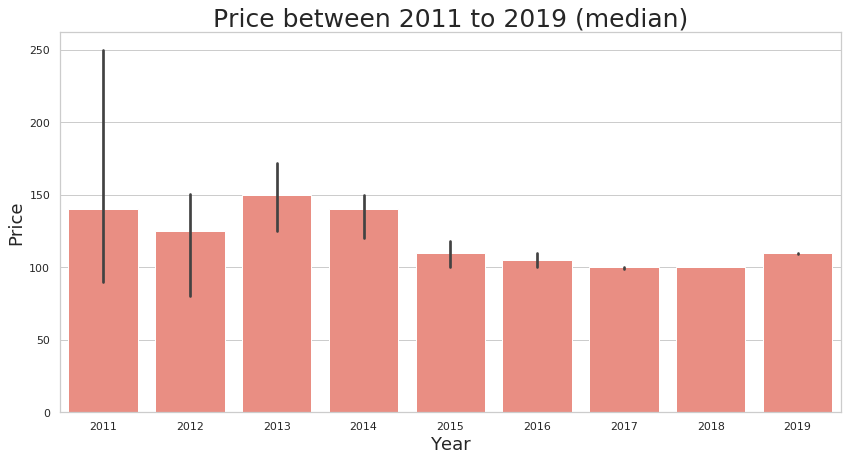

In [60]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x="year", y="price", data=airbnb_df, 
                 estimator=np.median, color="salmon")
ax.axes.set_title("Price between 2011 to 2019 (median)", fontsize=25)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Price",fontsize=18)

Text(0, 0.5, 'Price')

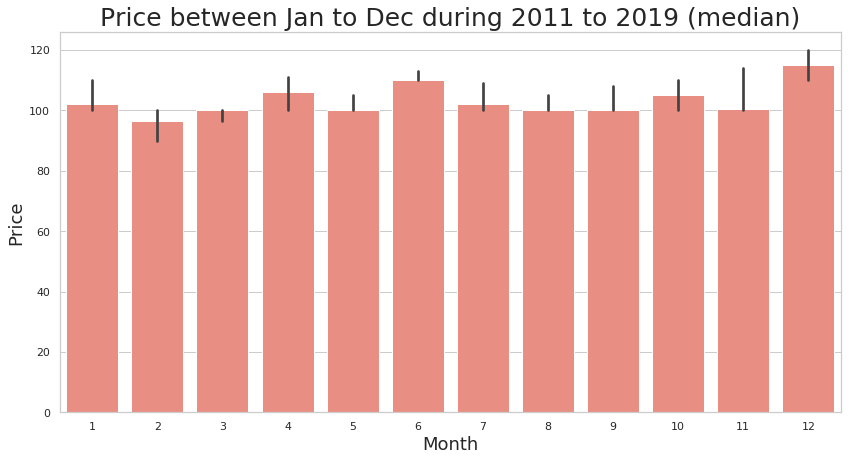

In [61]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x="month", y="price", data=airbnb_df, 
                 estimator=np.median, color="salmon")
ax.axes.set_title("Price between Jan to Dec during 2011 to 2019 (median)", fontsize=25)
ax.set_xlabel("Month",fontsize=18)
ax.set_ylabel("Price",fontsize=18)

Text(0, 0.5, 'Price')

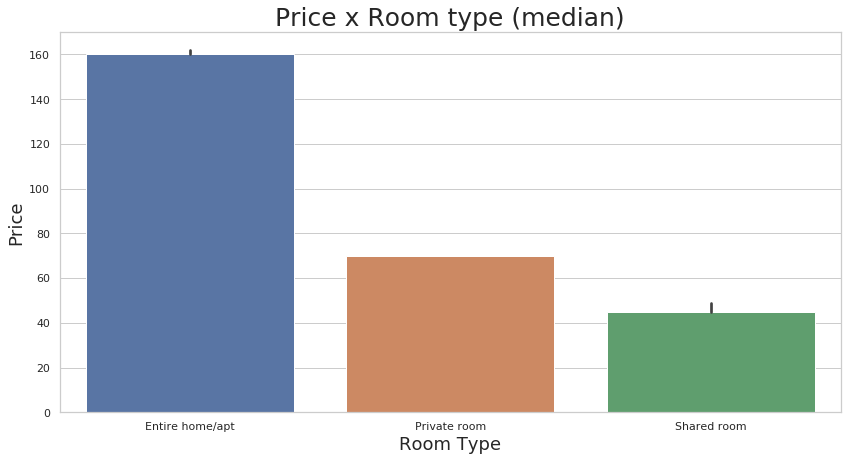

In [62]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='room_type', y='price', data=airbnb_df, estimator=np.median)
ax.axes.set_title("Price x Room type (median)", fontsize=25)
ax.set_xlabel("Room Type", fontsize=18)
ax.set_ylabel("Price", fontsize=18)

Text(0, 0.5, 'Price')

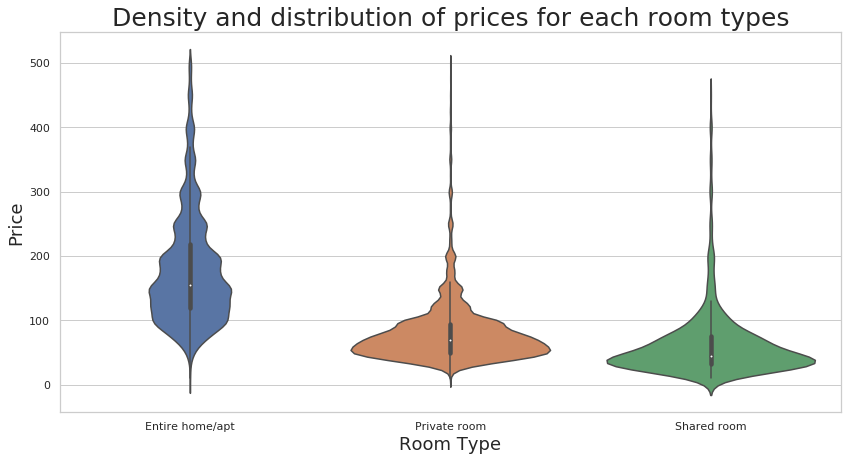

In [63]:
plt.figure(figsize=(14, 7))
ax = sns.violinplot(x='room_type', y='price', data=airbnb_df.loc[airbnb_df.price < 500])
ax.axes.set_title("Density and distribution of prices for each room types", fontsize=25)
ax.set_xlabel("Room Type", fontsize=18)
ax.set_ylabel("Price", fontsize=18)

Text(0, 0.5, 'Price')

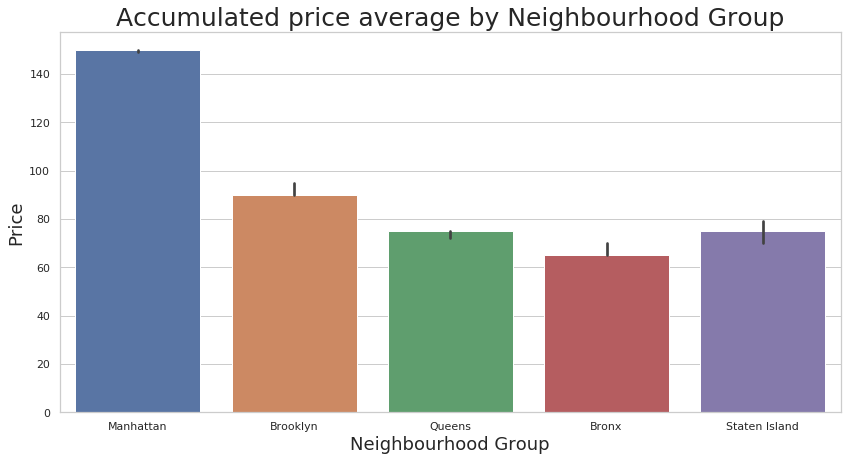

In [64]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='neighbourhood_group', y='price', data=airbnb_df, estimator=np.median)
ax.axes.set_title("Accumulated price average by Neighbourhood Group", fontsize=25)
ax.set_xlabel("Neighbourhood Group", fontsize=18)
ax.set_ylabel("Price", fontsize=18)

Text(0, 0.5, 'Price')

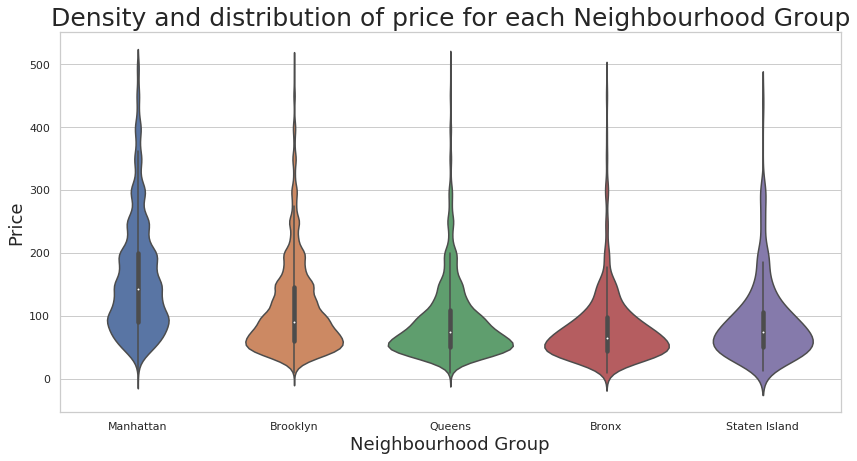

In [65]:
plt.figure(figsize=(14, 7))
ax = sns.violinplot(x='neighbourhood_group', y='price', data=airbnb_df.loc[airbnb_df.price < 500])
ax.axes.set_title("Density and distribution of price for each Neighbourhood Group", fontsize=25)
ax.set_xlabel("Neighbourhood Group", fontsize=18)
ax.set_ylabel("Price", fontsize=18)

Text(0, 0.5, 'Price')

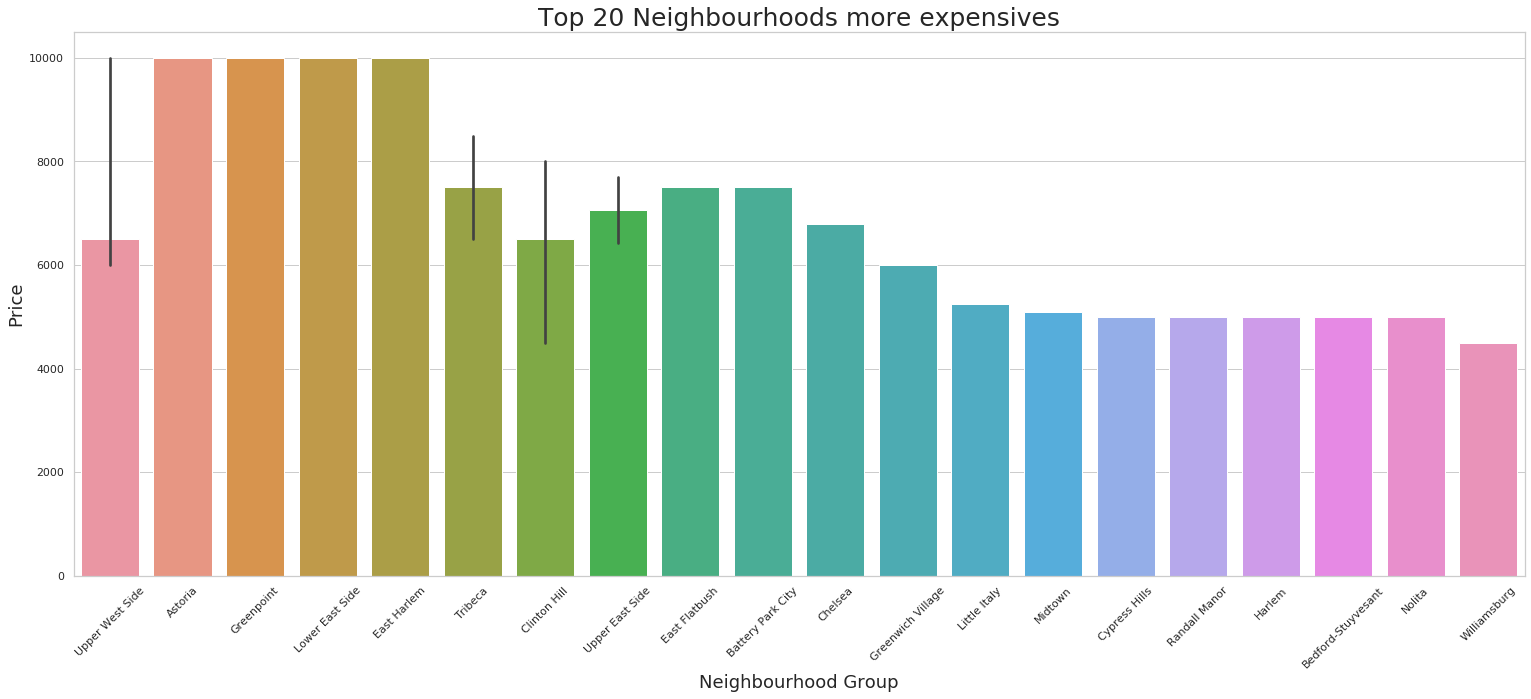

In [66]:
plt.figure(figsize=(26, 10))
ax = sns.barplot(x='neighbourhood', y='price',
                 data=airbnb_df.sort_values(by=['price'], ascending=False).iloc[0:28],
                 estimator=np.median)

ax.axes.set_title("Top 20 Neighbourhoods more expensives", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("Neighbourhood Group", fontsize=18)
ax.set_ylabel("Price", fontsize=18)

<Figure size 1008x504 with 0 Axes>

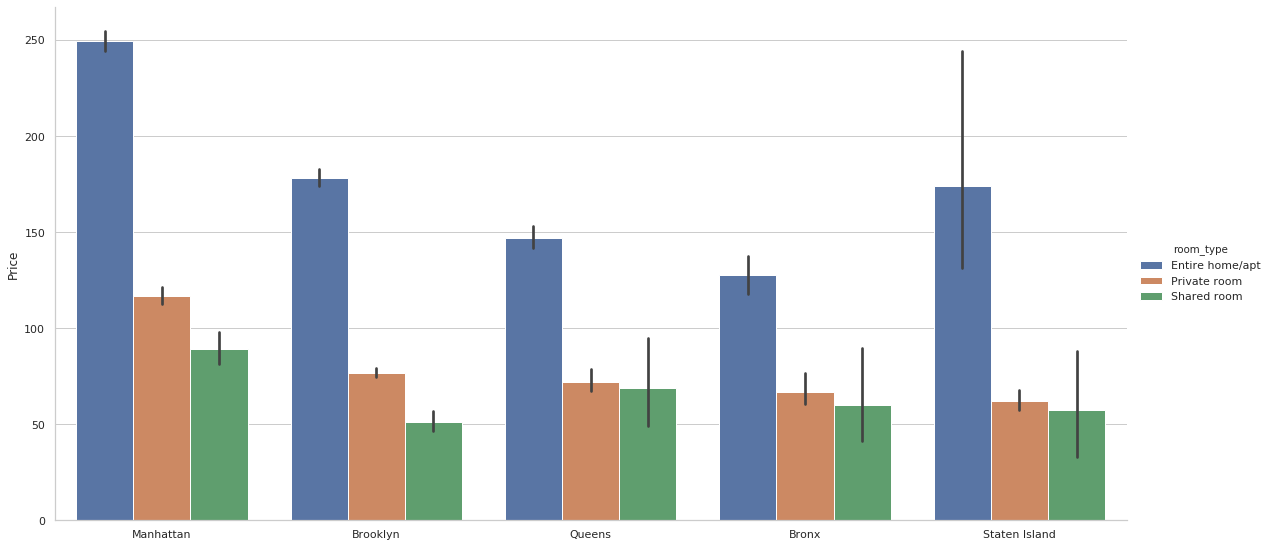

In [67]:
plt.figure(figsize=(14, 7))
ax = sns.catplot(x="neighbourhood_group", y="price", 
                 hue='room_type', data=airbnb_df,
                 kind="bar", height=8, aspect=2)
ax.set_axis_labels('', 'Price')

### Analisando reviews

Text(0, 0.5, 'Number of Reviews')

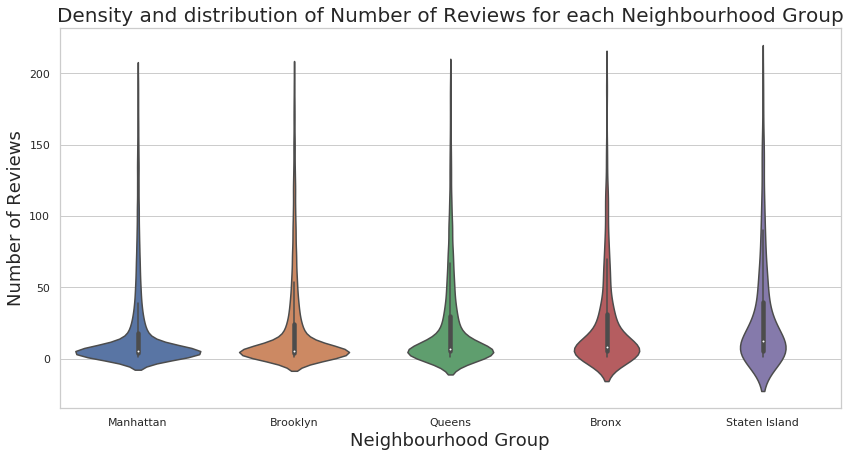

In [68]:
plt.figure(figsize=(14, 7))
ax = sns.violinplot(x="neighbourhood_group", y="number_of_reviews", data=airbnb_df.loc[airbnb_df.number_of_reviews < 200])
ax.axes.set_title("Density and distribution of Number of Reviews for each Neighbourhood Group", fontsize=20)
ax.set_xlabel("Neighbourhood Group", fontsize=18)
ax.set_ylabel("Number of Reviews", fontsize=18)

Text(0, 0.5, 'Number of Reviews')

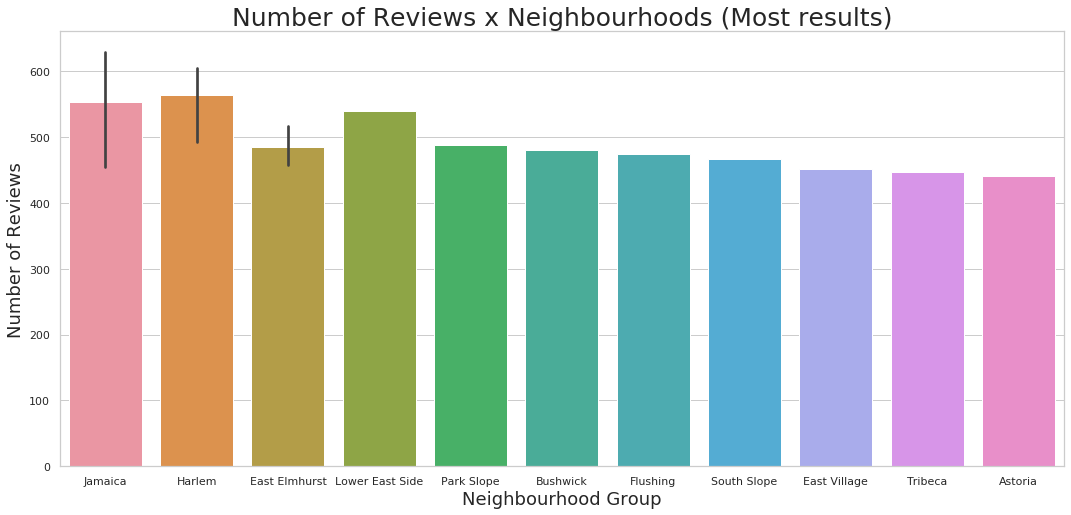

In [69]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x="neighbourhood", y="number_of_reviews",
                 data=airbnb_df.sort_values(by=['number_of_reviews'],
                                            ascending=False).iloc[:20])

ax.set_title("Number of Reviews x Neighbourhoods (Most results)", fontsize=25)
ax.set_xlabel("Neighbourhood Group", fontsize=18)
ax.set_ylabel("Number of Reviews", fontsize=18)

Text(0, 0.5, 'Number of reviews')

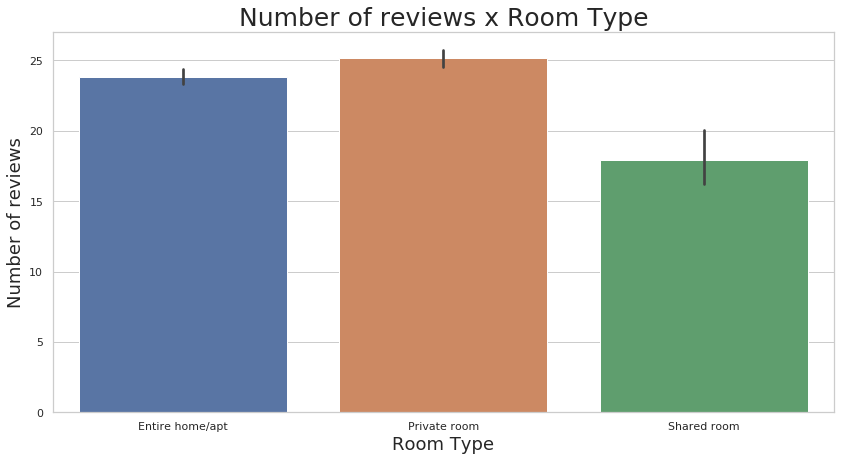

In [70]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x="room_type", y="number_of_reviews", data=airbnb_df)

ax.set_title("Number of reviews x Room Type", fontsize=25)
ax.set_xlabel("Room Type", fontsize=18)
ax.set_ylabel("Number of reviews", fontsize=18)

Text(0, 0.5, 'Price')

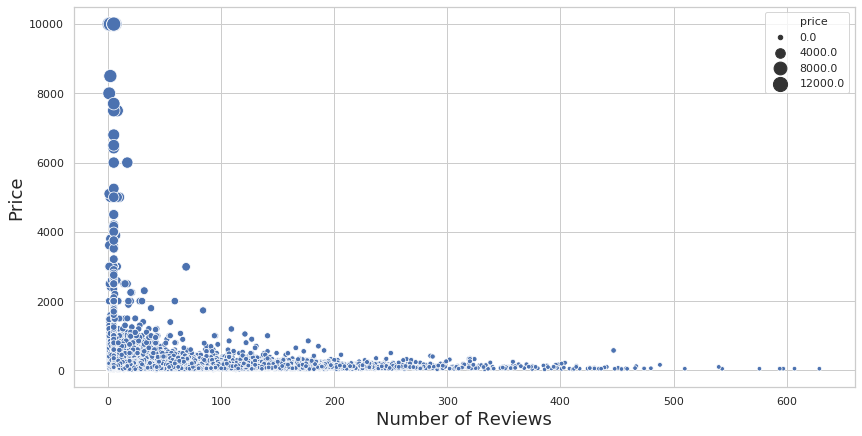

In [71]:
plt.figure(figsize=(14, 7))
ax = sns.scatterplot(x="number_of_reviews", y="price", 
                    size='price', sizes=(20, 200), 
                    data=airbnb_df)

ax.set_xlabel("Number of Reviews", fontsize=18)
ax.set_ylabel("Price", fontsize=18)

### Analisando coluna 'minimum_nights'

Text(0, 0.5, 'Minimum Nights')

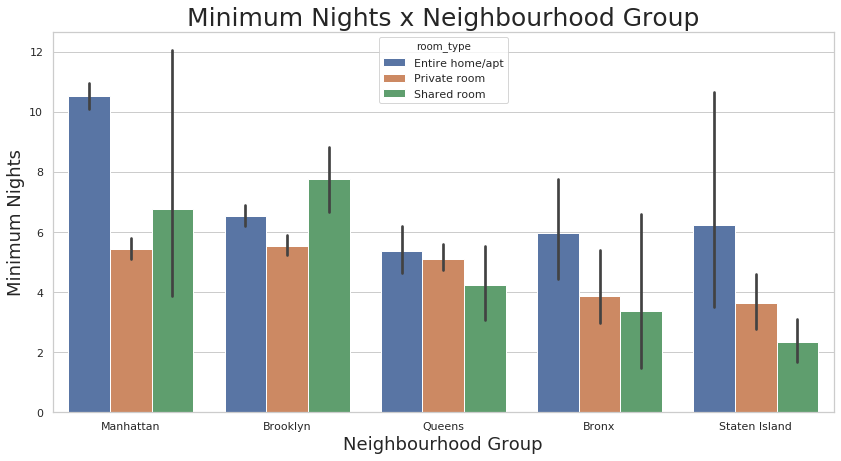

In [72]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x="neighbourhood_group", y="minimum_nights", hue="room_type", data=airbnb_df)
ax.axes.set_title("Minimum Nights x Neighbourhood Group", fontsize=25)
ax.set_xlabel("Neighbourhood Group", fontsize=18)
ax.set_ylabel("Minimum Nights", fontsize=18)

Text(0, 0.5, 'Minimum nights')

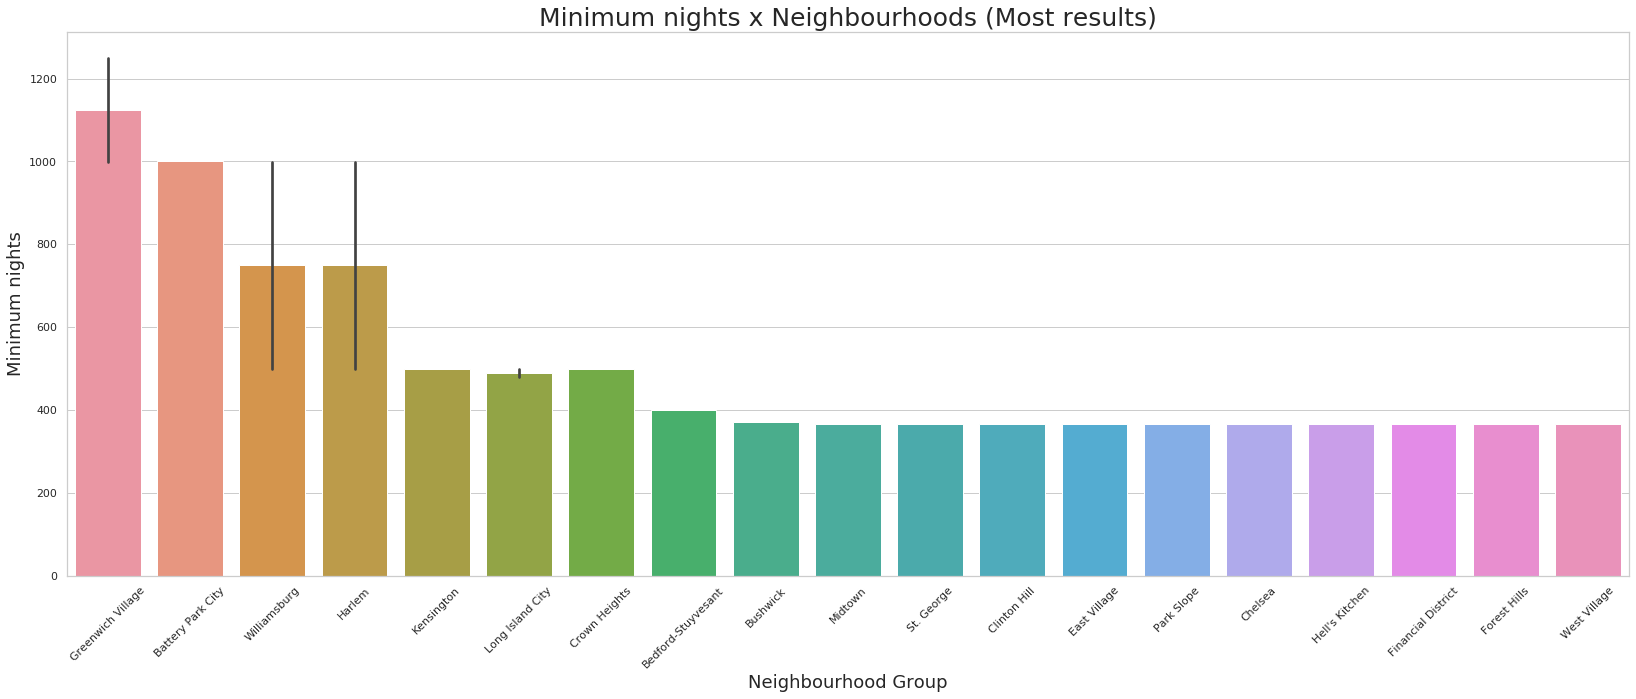

In [73]:
plt.figure(figsize=(28, 10))
ax = sns.barplot(x="neighbourhood", y="minimum_nights",
                 data=airbnb_df.sort_values(by=['minimum_nights'],
                                            ascending=False).iloc[:28])

ax.set_title("Minimum nights x Neighbourhoods (Most results)", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("Neighbourhood Group", fontsize=18)
ax.set_ylabel("Minimum nights", fontsize=18)

Text(0, 0.5, 'Minimum Nights')

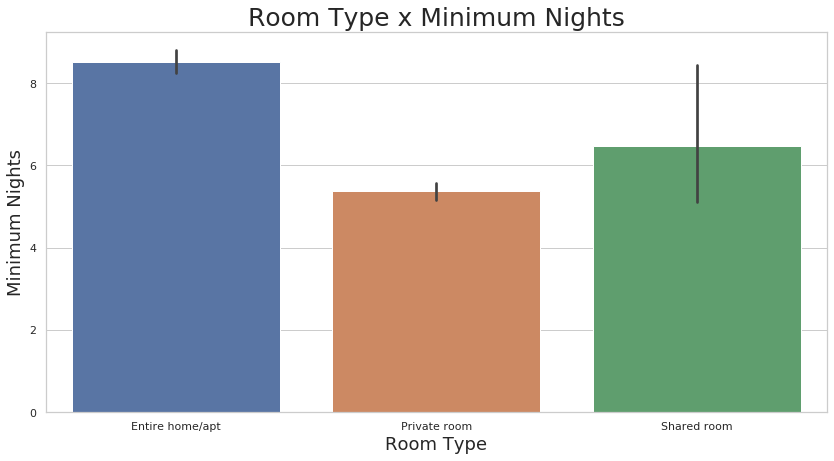

In [74]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x="room_type", y="minimum_nights", data=airbnb_df)

ax.set_title("Room Type x Minimum Nights", fontsize=25)
ax.set_xlabel("Room Type", fontsize=18)
ax.set_ylabel("Minimum Nights", fontsize=18)

Text(0, 0.5, 'Minimum Nights')

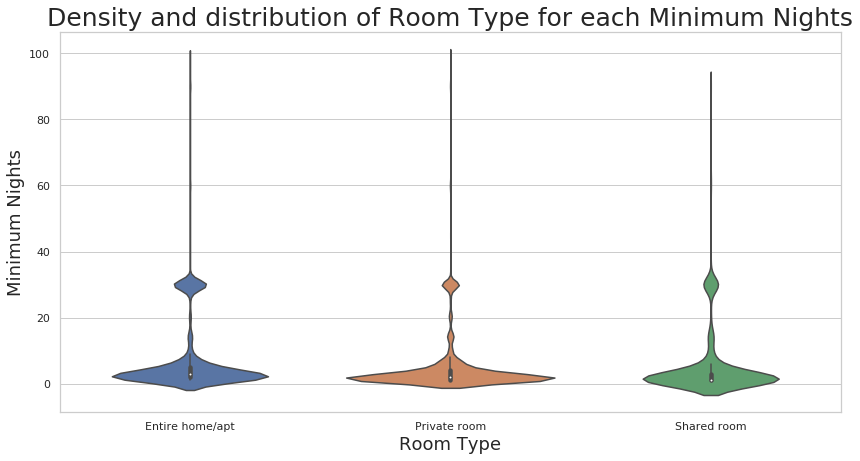

In [75]:
plt.figure(figsize=(14, 7))
ax = sns.violinplot(x="room_type", y="minimum_nights", data=airbnb_df.loc[airbnb_df.minimum_nights < 100])
ax.set_title("Density and distribution of Room Type for each Minimum Nights", fontsize=25)
ax.set_xlabel("Room Type", fontsize=18)
ax.set_ylabel("Minimum Nights", fontsize=18)

Text(0, 0.5, 'Price')

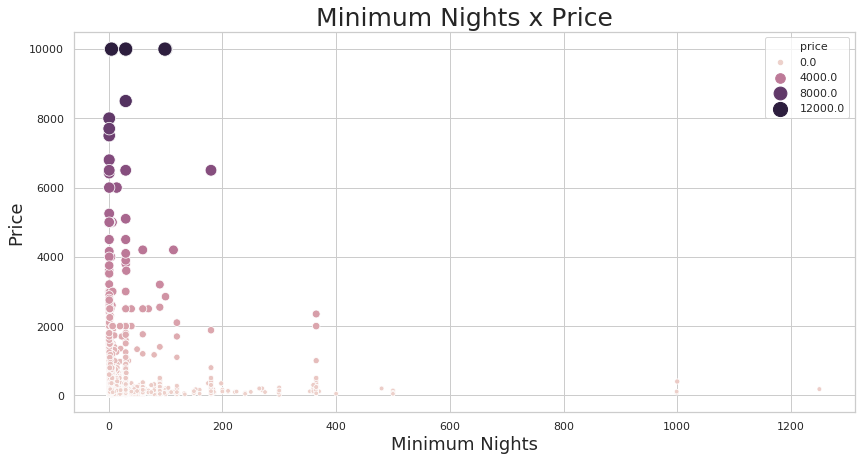

In [76]:
plt.figure(figsize=(14, 7))
ax = sns.scatterplot(x="minimum_nights", y="price",
                     hue='price', size='price',
                     sizes=(20, 200), data=airbnb_df)

ax.set_title("Minimum Nights x Price", fontsize=25)
ax.set_xlabel("Minimum Nights", fontsize=18)
ax.set_ylabel("Price", fontsize=18)

### Output dataframe for ML

In [77]:
data = airbnb_df.drop(['neighbourhood', 'number_of_reviews', 
                       'reviews_per_month', 'latitude', 'longitude', 
                       'month', 'year'], axis=1)

In [78]:
data.to_csv('airbnb_ny_ready_to_ml.csv', index=False)